# Como se ve un espectro de Fourier

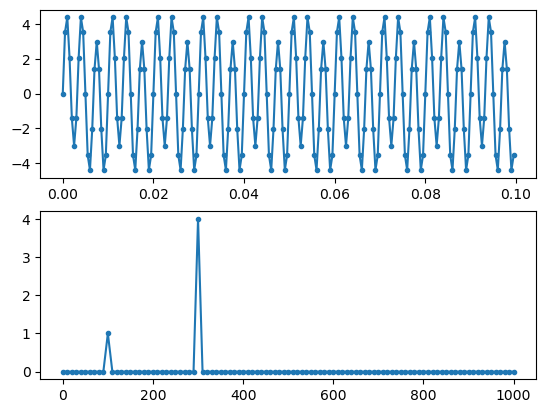

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ==========datos================
Fs = 2000      # sample frequency
tstep = 1 / Fs # sample time interval
f0 = 100       # signal frequency


N = 10 * int(Fs / f0) # number of samples
# ==============================

t = np.linspace(0, (N-1) * tstep, N) 
fstep = Fs / N # frequency interval
f = np.linspace(0, (N-1) * fstep, N)

# datos cocinados para ejemplo
acceleration_data = 1 * np.sin(2 * np.pi * f0 * t) + 4 * np.sin(6 * np.pi * f0 * t)

fft_acceleration = np.fft.fft(acceleration_data)
fft_mag = np.abs(fft_acceleration) / N


# dada mi maxima frecuencia puedo reconstruir hasta bajo la mitad de esta
f_plot = f[0:int(N/2+1)] #nyquist theorem
fft_mag_plot = 2 * fft_mag[0:int(N/2+1)] 
fft_mag_plot[0] = fft_mag_plot[0] / 2


fig, ax = plt.subplots(nrows = 2, ncols=1)
ax[0].plot(t, acceleration_data, '.-')
ax[1].plot(f_plot, fft_mag_plot, '.-')
plt.show()

# Ejemplo con datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

dataframe = pd.read_csv("accelerometer_datosTrabajo1.csv")

print(f"cantidad columnas: {len(dataframe.columns)}, cantidad filas: {len(dataframe)}")

cantidad columnas: 5, cantidad filas: 153000


De acuerdo a los datos:
The vibration measurements were collected at a frequency of 20 ms for 1 min for each percentage, generating 3000 records per speed. Thus, in total, 153,000 vibration records were collected from the simulation model.

Podemos asi extraer:
- tstep: $20 \mu s$ permite calcular la sample frequency (cuantos datos capturamos por segundo)
- N: 3000 el total de datos, osea por 1 minuto multiplicado a la sample frequency


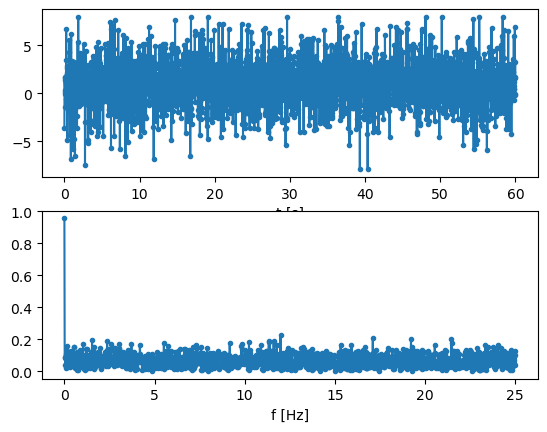

In [3]:
# first weight configutation and 100 percent of blade
acceleration_data = dataframe[(dataframe['wconfid'] == 1) & (dataframe['pctid'] == 100)].x.values


# =================datos=======================
tstep = 0.02 # sample time interval of 20ms
Fs = 1/tstep      # sample frequency (50 Hz)

N = int(Fs * 60) # number of samples
assert N == 3000

fstep = Fs / N # frequency interval

# ==============================================
t = np.linspace(0, (N-1) * tstep, N) 
f = np.linspace(0, (N-1) * fstep, N)


fft_acceleration = np.fft.fft(acceleration_data)
fft_mag = np.abs(fft_acceleration) / N


# dada mi maxima frecuencia puedo reconstruir hasta bajo la mitad de esta
f_plot = f[0:int(N/2+1)] #nyquist theorem
fft_mag_plot = 2 * fft_mag[0:int(N/2+1)] # cuenta por la energia de las frecuencias negativas
fft_mag_plot[0] = fft_mag_plot[0] / 2 # el primer componente solo aparece una vez, no 2


fig, ax = plt.subplots(nrows = 2, ncols=1)
ax[0].plot(t, acceleration_data, '.-')
ax[0].set_xlabel('t [s]')
ax[1].plot(f_plot, fft_mag_plot, '.-')
ax[1].set_xlabel('f [Hz]')
plt.show()

In [18]:
# guardado todo dentro de una función:
def transform_fourier_plot(data, tstep, total_time, N, title):
    # first weight configutation and 100 percent of blade
    acceleration_data = dataframe[(dataframe['wconfid'] == 1) & (dataframe['pctid'] == 100)].x.values


    # =================datos=======================
    # tstep sample time interval in seconds
    Fs = 1/tstep    # sample frequency (Hz)

    N_ = int(Fs * total_time) # number of samples
    assert N_ == N # para comprobar errores

    fstep = Fs / N # frequency interval

    # ==============================================
    t = np.linspace(0, (N-1) * tstep, N) 
    f = np.linspace(0, (N-1) * fstep, N)


    fft_data = np.fft.fft(data) / N
    # se divide sobre N para normalizar
    fft_mag = np.abs(fft_data)


    # dada mi maxima frecuencia puedo reconstruir hasta bajo la mitad de esta
    f_plot = f[0:int(N/2+1)] #nyquist theorem
    fft_mag_plot = 2 * fft_mag[0:int(N/2+1)] # cuenta por la energia de las frecuencias negativas
    fft_mag_plot[0] = fft_mag_plot[0] / 2 # el primer componente solo aparece una vez, no 2


    fig, ax = plt.subplots(nrows = 2, ncols=1)
    ax[0].plot(t, data, '.-')
    ax[0].set_xlabel('t [s]')
    ax[1].plot(f_plot, fft_mag_plot, '.-')
    ax[1].set_xlabel('f [Hz]')
    fig.suptitle(title)
    plt.show()

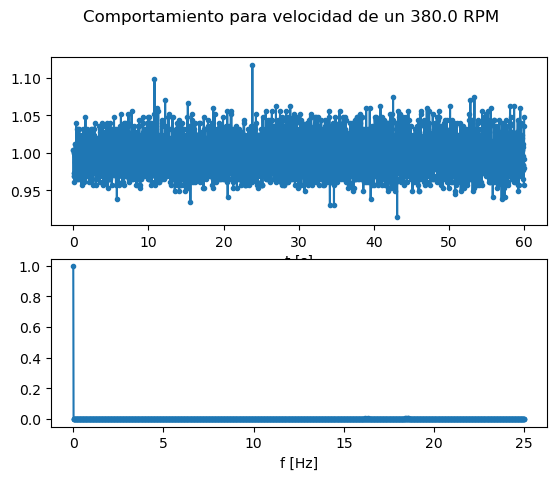

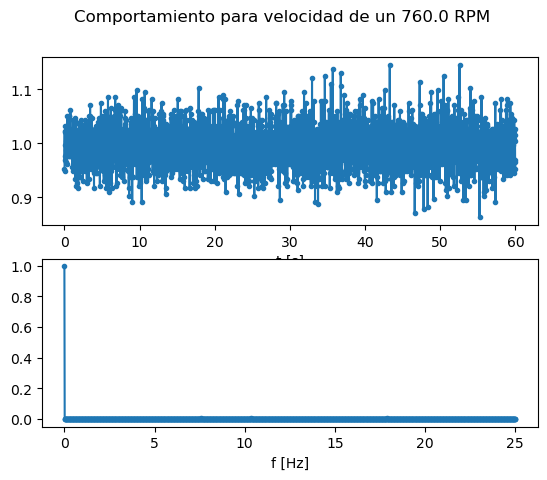

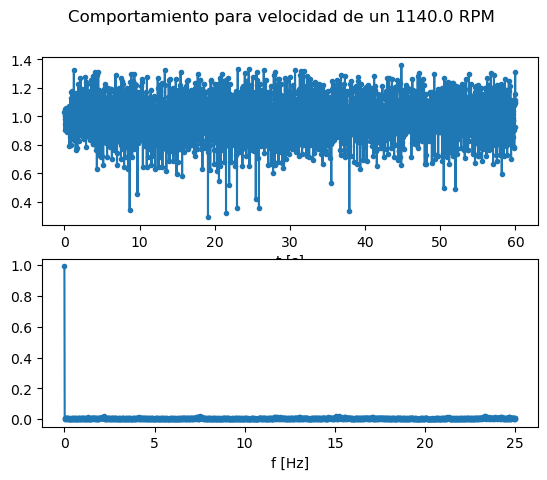

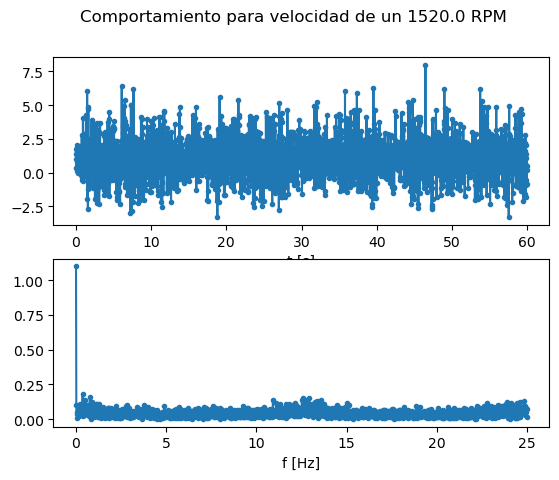

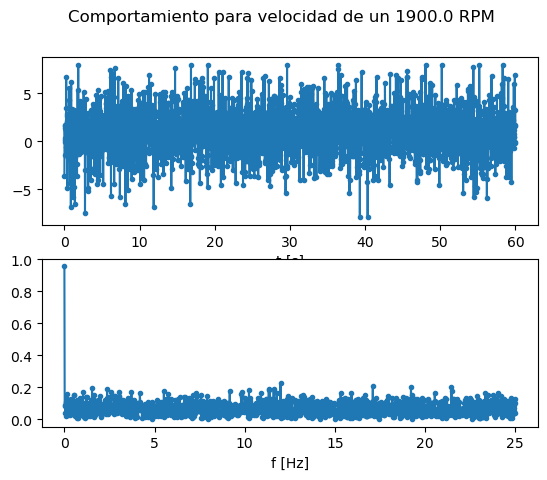

In [19]:
for pctid in [20, 40, 60, 80, 100]:

    transform_fourier_plot(
        dataframe[(dataframe['wconfid'] == 1) & (dataframe['pctid'] == pctid)].x.values, 
        tstep=0.02, total_time=60, N=3000, 
        title= f"Comportamiento para velocidad de un {pctid * 1900 / 100} RPM"
    )
    

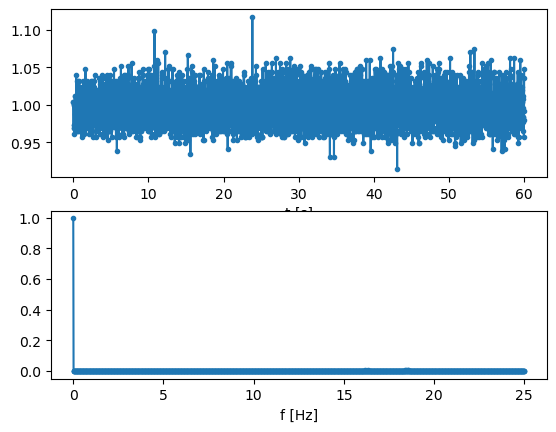